<a href="https://colab.research.google.com/github/brenosyperrek/pandas_seaborn/blob/main/EAD_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conetando Google Drive

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando base de dados

In [124]:
import pandas as pd

In [125]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pandas_seaborn/dados/tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [126]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


# Tradução

In [127]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [128]:
renomear = {'total_bill' : 'valor_da_conta',
            'tip' : 'gorjeta',
            'dessert' : 'sobremesa',
            'day' : 'dia_da_semana',
            'time' : 'hora_do_dia',
            'size': 'total_de_pessoas'}

In [129]:
gorjetas = dados.rename(columns = renomear)

In [130]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [131]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [132]:
sim_nao = {'No' : 'Não', 'Yes' : 'Sim'}

In [133]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [134]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [135]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [136]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [137]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [138]:
dia_da_semana = {'Sun' : 'Domingo', 'Sat' : 'Sábado', 'Thur' : 'Quinta-Feira', 'Fri' : 'Sexta-Feira'}

In [139]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dia_da_semana)

In [140]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [141]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [142]:
hora = {'Dinner' : 'Jantar', 'Lunch' : 'Almoço'}

In [143]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [144]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Importando seaborn

In [145]:
import seaborn as sns
sns.__version__

'0.11.2'

# Análise I - Valor da conta e gorjetas

In [146]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

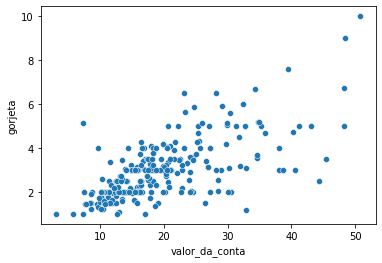

In [147]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta',y='gorjeta',data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta.**

In [148]:
print('A base de dados possui {} registros.\n'.format(gorjetas.shape[0]))
# print('O campo Valor possui {} restros não nulos'.format(gorjetas.valor_da_conta.notnull().count()))
print('Registros não nulos: ')
gorjetas.count()

A base de dados possui 244 registros.

Registros não nulos: 


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [149]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [150]:
gorjetas['porcentagem'] = gorjetas.gorjeta/gorjetas.valor_da_conta
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [151]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


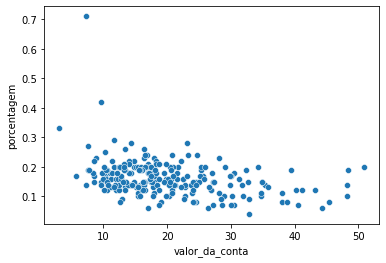

In [152]:
proporcao = sns.scatterplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

**Visualmente, o valor da gorjeta não é proporcional ao valor da conta.**

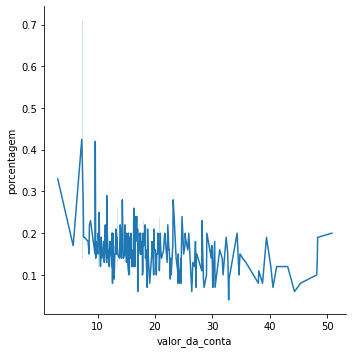

In [153]:
proporcao_em_linha = sns.relplot(x='valor_da_conta',y='porcentagem',data=gorjetas, kind='line')

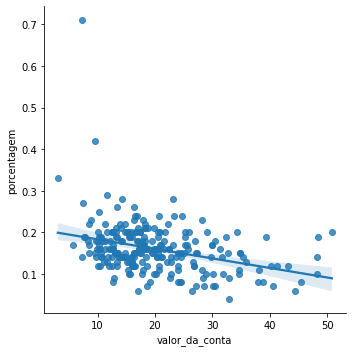

In [154]:
sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

#Análise II - Sobremesa

In [155]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [156]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


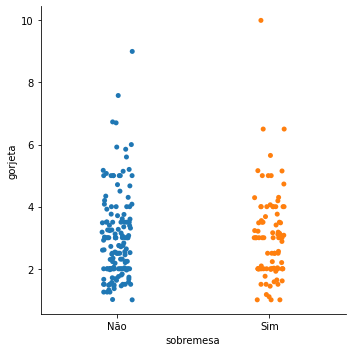

In [157]:
sns.catplot(x='sobremesa',y='gorjeta',data=gorjetas)

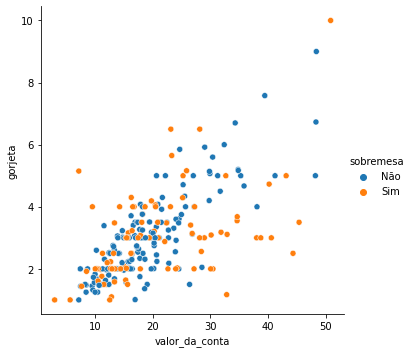

In [158]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

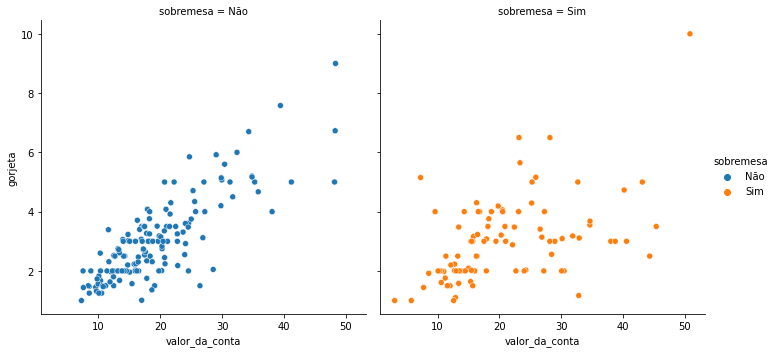

In [159]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas, col='sobremesa')

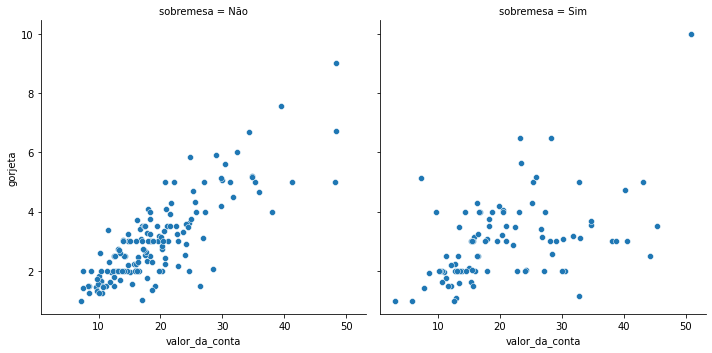

In [160]:
sns.relplot(x='valor_da_conta', y='gorjeta', data=gorjetas, col='sobremesa')

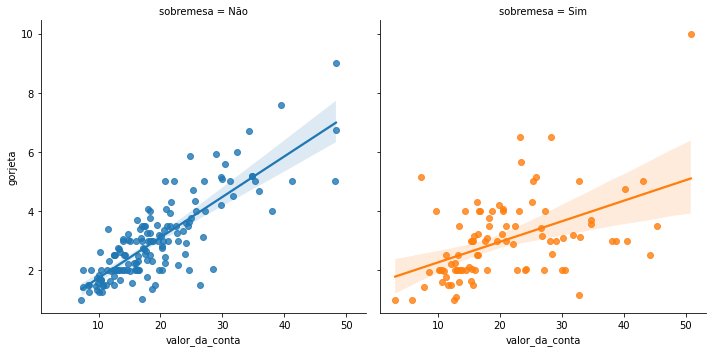

In [161]:
sns.lmplot(x='valor_da_conta',y='gorjeta', data=gorjetas, col='sobremesa',hue='sobremesa')

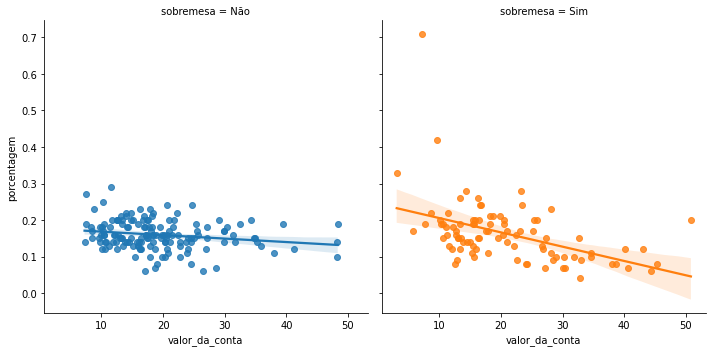

In [162]:
sns.lmplot(x='valor_da_conta',y='porcentagem', data=gorjetas, col='sobremesa',hue='sobremesa')

**Visualmente, exite diferênça na gorjeta de quem pede e quem não pede sobremesa.**

#Teste de hipótese

**H<sup>null</sup>**
**A distribuição da taxa da gorjeta é a mesma nos dois grupos.**

**H<sup>alt</sup>**
**A distribuição da taxa da gorjeta não é a mesma nos dois grupos.**

In [163]:
from scipy.stats import ranksums

In [164]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem
sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem

In [165]:
r = ranksums(sobremesa,sem_sobremesa)

In [166]:
print('O valor de p-value é {}'.format(r.pvalue))

O valor de p-value é 0.5266635660124415


**H<sup>null</sup>**
**A distribuição da taxa da gorjeta é a mesma nos dois grupos.**

#Análise III - Dia da Semana

In [167]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta-Feira', 'Sexta-Feira'], dtype=object)

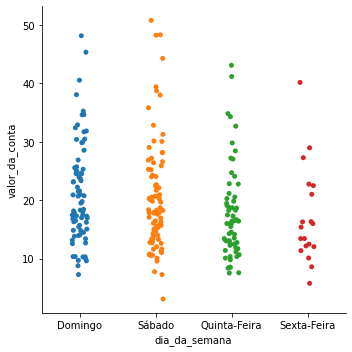

In [168]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

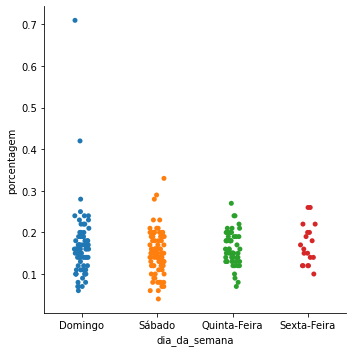

In [174]:
sns.catplot(x='dia_da_semana', y='porcentagem', data=gorjetas)

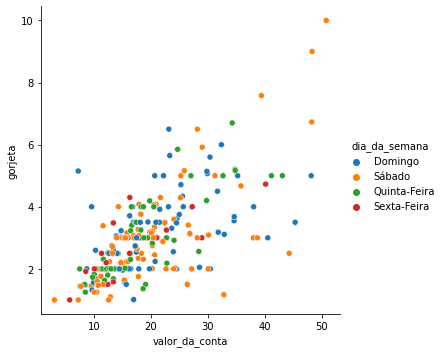

In [172]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

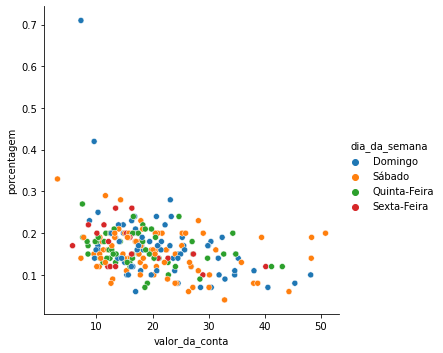

In [173]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

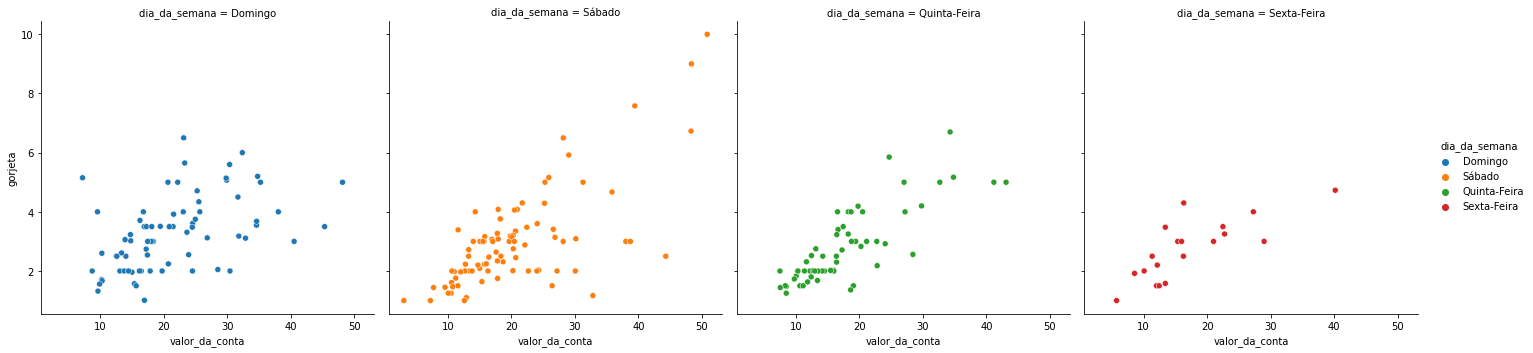

In [175]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana',col='dia_da_semana', data=gorjetas)

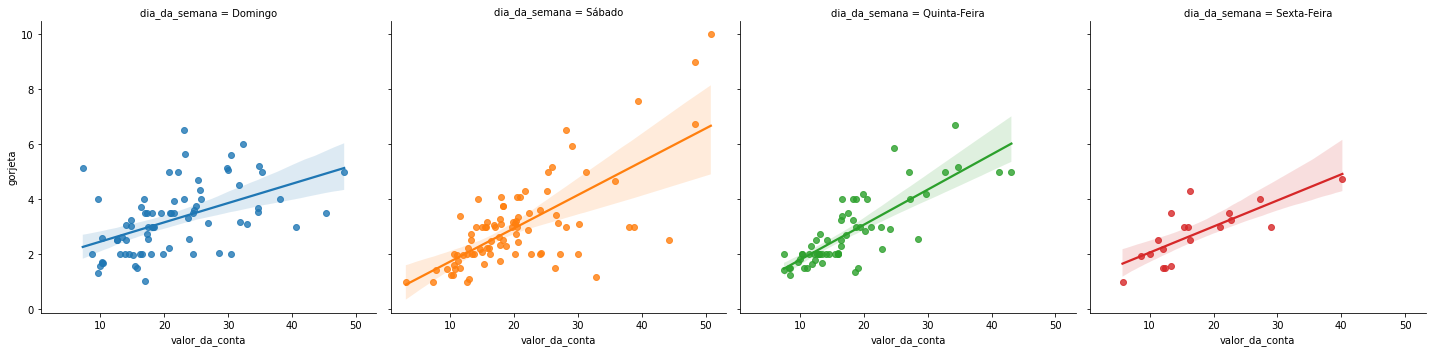

In [176]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana',col='dia_da_semana', data=gorjetas)

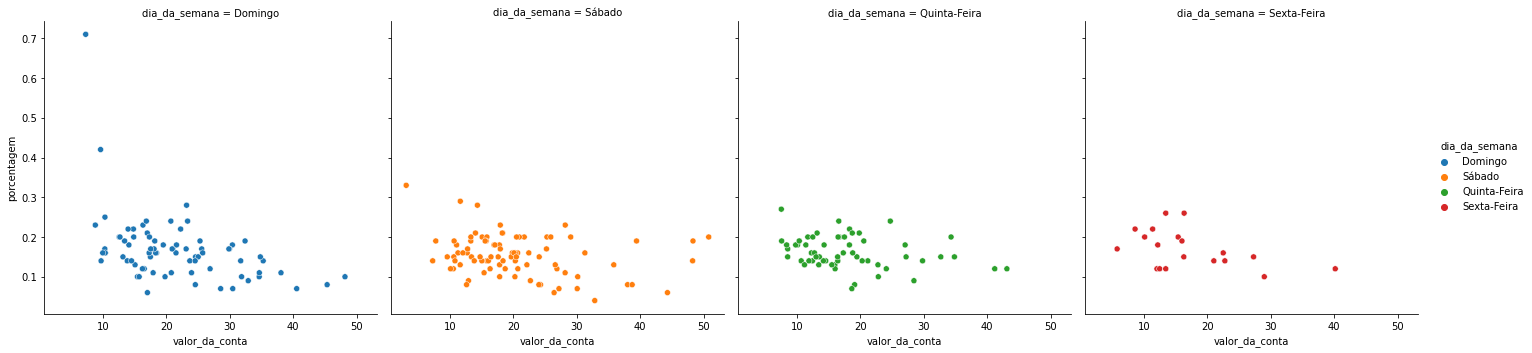

In [177]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana',col='dia_da_semana', data=gorjetas)

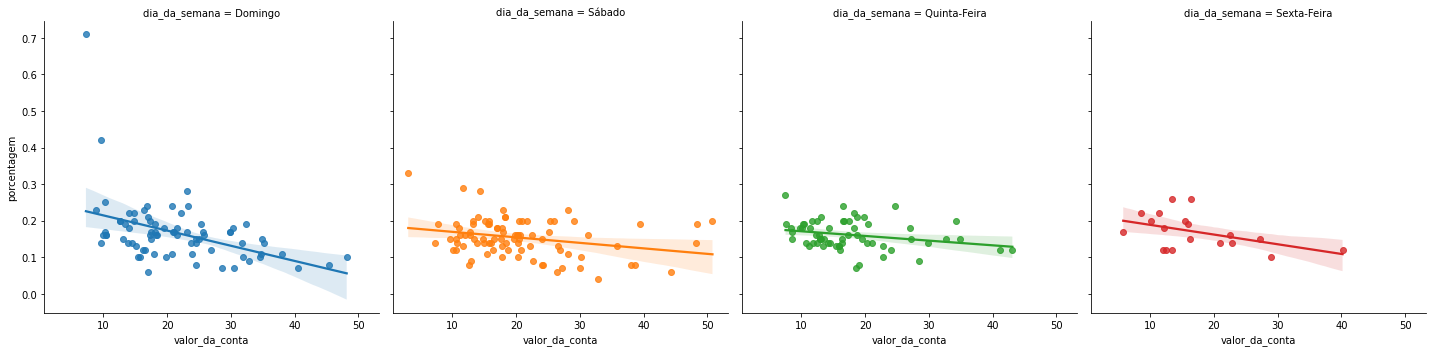

In [178]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana',col='dia_da_semana', data=gorjetas)

In [180]:
print('A média geral das gorjetas é {}'.format(gorjetas.gorjeta.mean().round(2)))

A média geral das gorjetas é 3.0


In [182]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta-Feira,17.682742,2.771452,0.161129
Sexta-Feira,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [183]:
gorjetas.dia_da_semana.value_counts()

Sábado          87
Domingo         76
Quinta-Feira    62
Sexta-Feira     19
Name: dia_da_semana, dtype: int64